<b>The following outcomes would ideally be expected from the following 4 weeks of internship:
<li>Build an AI algorithm that can classify the cancer type. 
<li>Decrease the amount of predictors while keeping the accuracy high.
<li>Identify the key predictors when a sample has been classified and report on these predictors through a graph, picture etc.
<li>The dataset must be utilised in a 60/40 Train/Test split.

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("IX_CancerData_TB.csv")

In [14]:
data.head(3)

,Unnamed: 0,Type,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000134108.11,ENSG00000263089.1,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,1,BRCA,1.557943,5.017788,6.132192,0.017186,66.914631,0.158791,27.166180,0.028598,...,0.007595,0.007793,0.0,0.055523,0.028739,10.243520,0.250405,0.0,0.613717,0.0
1,2,BRCA,2.697767,4.903484,9.750896,0.014376,72.009991,0.085830,52.731004,0.046374,...,0.030789,0.063184,0.0,0.000000,0.000000,16.606613,0.082307,0.0,0.170743,0.0
2,3,BRCA,5.831249,3.054890,17.232771,0.006936,89.093490,0.134583,36.967120,0.048476,...,0.144831,0.000000,0.0,0.058823,0.121788,20.069360,0.530575,0.0,0.305974,0.0


In [5]:
data.dtypes

Unnamed: 0              int64
Type                   object
ENSG00000242268.2     float64
ENSG00000270112.3     float64
ENSG00000167578.15    float64
                       ...   
ENSG00000105063.17    float64
ENSG00000231119.2     float64
ENSG00000280861.1     float64
ENSG00000123685.7     float64
ENSG00000181518.3     float64
Length: 58442, dtype: object

In [6]:
data.isna().sum()

Unnamed: 0            0
Type                  0
ENSG00000242268.2     0
ENSG00000270112.3     0
ENSG00000167578.15    0
                     ..
ENSG00000105063.17    0
ENSG00000231119.2     0
ENSG00000280861.1     0
ENSG00000123685.7     0
ENSG00000181518.3     0
Length: 58442, dtype: int64

## Data Cleaning

In [12]:
#count the number of zeros in each column
#calculate the percentage
#keep track of the columns that have less than 40% zeros

cols = []

for col in data:
    c = data[col]
    z = (c == 0).sum()
    zeros = z / 2109 * 100
    if zeros < 40:
        cols += [col]

In [42]:
data = data.loc[:, cols]

<b>Cancer Types:
<li>BRCA: Breast Invasive Carcinoma
<li>BLCA: Bladder Urothelial Carcinoma
<li>HNSC: Head and Neck Squamous Cell Carcinoma
<li>KIRC: Kidney Renal Clear Cell Carcinoma
<li>KIRP: Kidney Renal Papillary Cell Carcinoma
<li>COAD: Colon Adenocarcinoma
<li>LIHC: Liver Hepatocellular Carcinoma
<li>LUAD: Lung Adenocarcinoma
<li>LUSC: Lung Squamous Cell Carcinoma	
<li>OV: Ovarian Serous Cystadenocarcinoma
<li>PRAD: Prostate Adenocarcinoma

In [24]:
#divide dataframe according to cancer type
BRCA = data.loc[data.Type=="BRCA", cols]
BLCA = data.loc[data.Type=="BLCA", cols]
HNSC = data.loc[data.Type=="HNSC", cols]
KIRC = data.loc[data.Type=="KIRC", cols]
KIRP = data.loc[data.Type=="KIRP", cols]
COAD = data.loc[data.Type=="COAD", cols]
LIHC = data.loc[data.Type=="LIHC", cols]
LUAD = data.loc[data.Type=="LUAD", cols]
LUSC = data.loc[data.Type=="LUSC", cols]
OV = data.loc[data.Type=="OV", cols]
PRAD = data.loc[data.Type=="PRAD", cols]

## Dimension reduction

In [51]:
data.describe()

,Unnamed: 0,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,...,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000231612.1,ENSG00000009694.12,ENSG00000186115.11,ENSG00000267117.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000123685.7
count,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,...,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000,2109.000000
mean,1055.000000,3.635264,4.182546,13.169315,0.200361,191.930469,0.167644,27.762056,0.082159,3.047173,...,0.457871,4.370198,17.802599,0.095321,0.743316,3.191828,0.212433,15.504560,0.449303,0.863953
std,608.960179,2.350044,4.770590,7.283324,0.554549,160.992823,0.525611,12.383856,0.298873,11.141904,...,0.394194,3.104703,96.470054,0.215028,1.982985,12.021718,0.295863,7.051332,1.092886,1.015627
min,1.000000,0.435606,0.173593,0.531652,0.000000,18.880745,0.000000,4.958876,0.000000,0.000000,...,0.000000,0.236996,0.051239,0.000000,0.000000,0.000000,0.000000,0.898690,0.000000,0.014896
25%,528.000000,2.182142,2.328920,8.434296,0.018071,109.160270,0.027155,19.503659,0.012565,0.137321,...,0.205244,2.083603,1.126628,0.000000,0.016733,0.005259,0.047337,10.842311,0.091179,0.304265
50%,1055.000000,3.058661,3.590556,11.763797,0.077476,156.024028,0.068786,25.468607,0.032287,0.462232,...,0.351039,3.668490,2.489735,0.043291,0.095683,0.032998,0.122367,14.466283,0.203892,0.550797
75%,1582.000000,4.420560,5.146582,16.141889,0.196730,224.153528,0.142558,33.587505,0.069338,1.859535,...,0.589566,5.754199,4.972762,0.110292,0.640128,0.334817,0.256152,18.971165,0.414331,1.041430
max,2109.000000,38.696938,187.851601,61.809897,12.721510,3887.038686,9.731571,124.233477,6.089799,259.338758,...,4.274700,33.688644,1848.813610,3.547062,29.166522,158.911979,3.552154,94.792173,19.762116,13.888980


In [65]:
scaler = StandardScaler
scaler.fit(data)
scaled_data = scalar.transform(data)

TypeError: fit() missing 1 required positional argument: 'X'

## EDA

In [31]:
BRCA.head()

,Unnamed: 0,Type,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000134108.11,ENSG00000263089.1,...,ENSG00000213782.6,ENSG00000146707.13,ENSG00000135094.9,ENSG00000231612.1,ENSG00000009694.12,ENSG00000186115.11,ENSG00000267117.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000123685.7
0,1,BRCA,1.557943,5.017788,6.132192,0.017186,66.914631,0.158791,27.166180,0.028598,...,0.155464,2.374871,1.706492,0.219110,0.007595,0.007793,0.055523,10.243520,0.250405,0.613717
1,2,BRCA,2.697767,4.903484,9.750896,0.014376,72.009991,0.085830,52.731004,0.046374,...,0.236340,6.542841,4.490928,0.111032,0.030789,0.063184,0.000000,16.606613,0.082307,0.170743
2,3,BRCA,5.831249,3.054890,17.232771,0.006936,89.093490,0.134583,36.967120,0.048476,...,0.514699,4.669626,1.095969,0.116066,0.144831,0.000000,0.058823,20.069360,0.530575,0.305974
3,4,BRCA,5.013642,3.972959,14.478933,0.007975,154.499392,0.051581,22.438673,0.061931,...,0.426097,1.951768,9.432912,0.059313,0.022615,0.000000,0.090179,18.965261,0.095264,1.558708
4,5,BRCA,3.739011,2.789155,15.336983,0.050073,143.640545,0.158165,37.671767,0.065109,...,0.632537,6.964534,3.164238,0.155890,0.040526,0.027722,0.276519,12.879618,0.125190,0.488011


<AxesSubplot:xlabel='ENSG00000078237.5', ylabel='Type'>

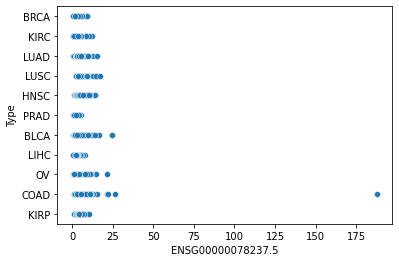

In [45]:
sns.scatterplot(x = data["ENSG00000078237.5"], y = data["Type"])

In [50]:
piv = data.pivot("Type", "ENSG00000078237.5")
sns.heatmap(piv)

KeyboardInterrupt: 